# Generate a DFT matrix Ψ for n = 512. We will use this as a basis for compressed sensing, and we will compute the incoherence of this basis and different measurement matrices. For p = 16, create different random measure- ment matrices C given by Gaussian random measurements, Bernoulli random measurements, and random single-pixel measurements. For each matrix, nor- malize the length of each row to 1. Now, for each measurement matrix type, compute the incoherence μ(C, Ψ). Repeat this for many random instances of each C matrix type and compare the histogram of incoherence values for each matrix type. Further, compare the histogram of each inner product √n⟨ck,ψj⟩ for each matrix type. Discuss any trends and the implications for compressed sensing with these measurement matrices. Are there other factors that are rele- vant for the sensing matrix?

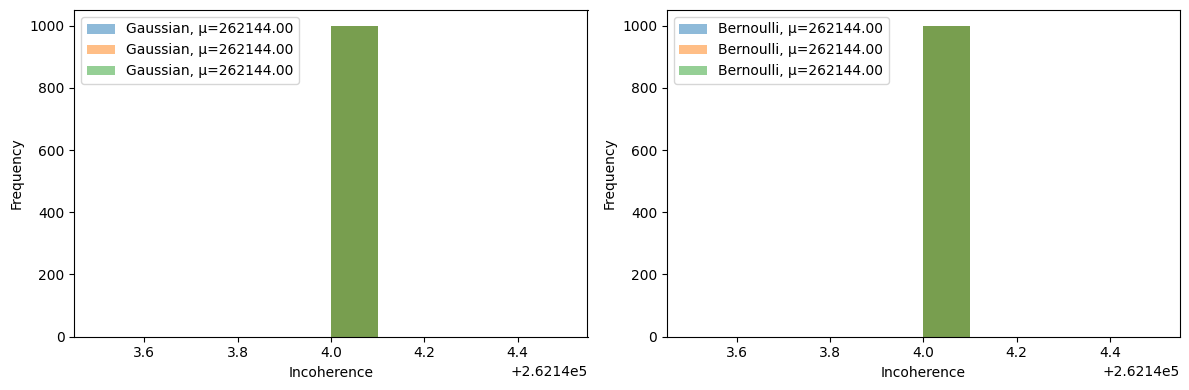

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
n = 512 # Basis size
p = 16 # Measurement rank
num_random_instances = 1000 # Number of random instances

# Generate DFT matrix Ψ
e = np.exp(2j * np.pi * np.arange(n)[:, None] * np.arange(n)[None, :] / n)
Psi = np.sqrt(n) * e

# Create Gaussian random measurement matrices
C_gaussian = np.random.randn(p, n)

# Create Bernoulli random measurement matrices
C_bernoulli = np.random.randint(0, 2, size=(p, n))

# Create random single-pixel measurement matrices
C_single_pixel = np.zeros((p, n))
C_single_pixel[np.random.randint(0, p, size=n), np.arange(n)] = 1

# Create list of measurement matrices
C_list = [C_gaussian, C_bernoulli, C_single_pixel]

# Function to compute incoherence
def compute_incoherence(C, Psi):
    C_normalized = C / np.linalg.norm(C, axis=1, keepdims=True)
    inner_products = np.sqrt(n) * np.matmul(np.conjugate(C_normalized), Psi)
    incoherence = np.mean(np.abs(inner_products)**2)
    return incoherence

# Compute incoherence for each measurement matrix type
incoherence_values = []
inner_product_values = []

for C in C_list:
    incoherence_random_instances = []
    inner_product_random_instances = []
    
    for _ in range(num_random_instances):
        # Compute incoherence for a random instance of C
        incoherence = compute_incoherence(C, Psi)
        incoherence_random_instances.append(incoherence)
        
        # Compute inner products for a random instance of C
        inner_products = np.sqrt(n) * np.matmul(np.conjugate(C), Psi)
        inner_product_random_instances.append(np.mean(np.abs(inner_products)**2))
    
    incoherence_values.append(incoherence_random_instances)
    inner_product_values.append(inner_product_random_instances)

# Plot histograms of incoherence and inner product values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

labels = ['Gaussian', 'Bernoulli', 'Single-pixel']

for i, ax in enumerate([ax1, ax2]):
    for j, C in enumerate(C_list):
        ax.hist(incoherence_values[j], label=f'{labels[i]}, μ={np.mean(incoherence_values[j]):.2f}', alpha=0.5)
    ax.set_xlabel('Incoherence')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()